![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [58]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


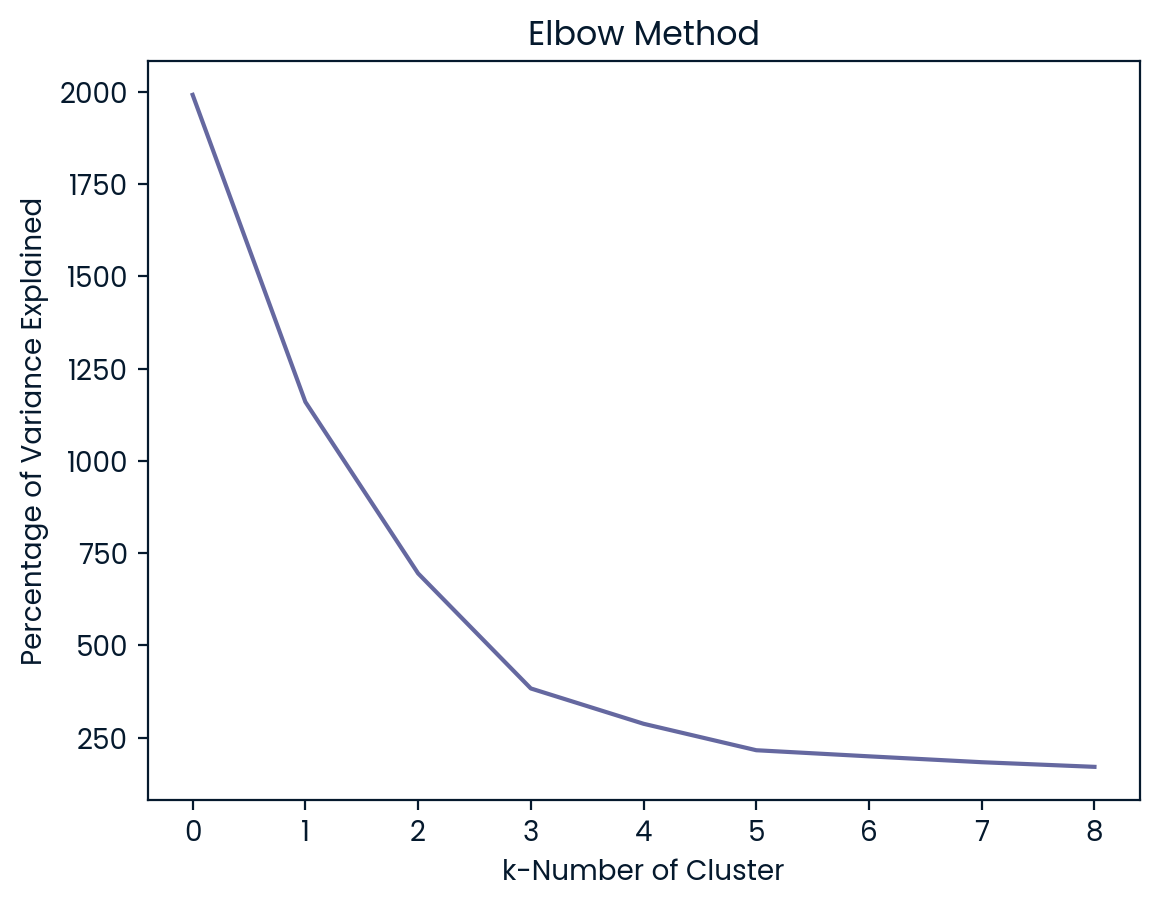

In [66]:
# Scale
df = pd.get_dummies(penguins_df, dtype=int)
scaler = StandardScaler()
X = scaler.fit_transform(df)

#Elbow
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(inertia)
plt.title("Elbow Method")
plt.xlabel("k-Number of Cluster")
plt.ylabel("Percentage of Variance Explained")
plt.show()

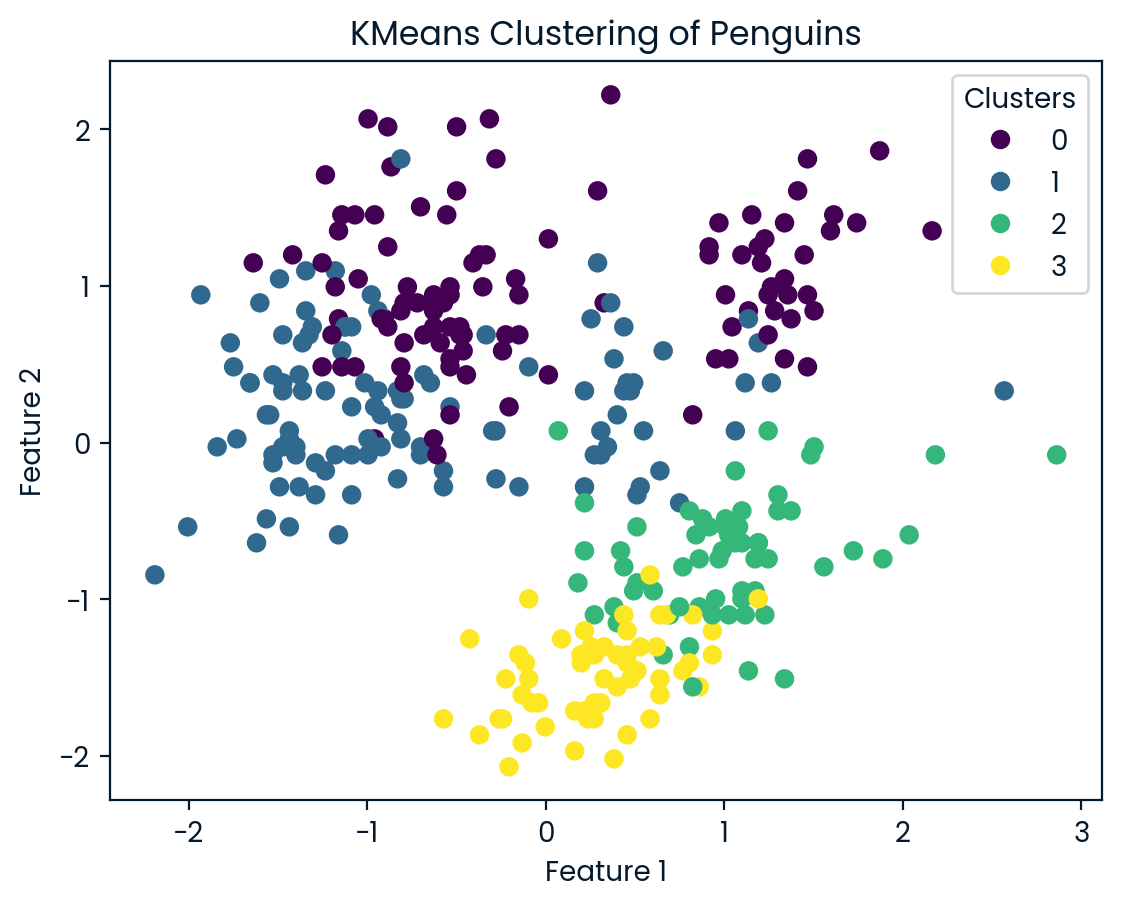

In [73]:
# KMeans 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.title("KMeans Clustering of Penguins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [64]:
# Final dataset
num_columns = list(penguins_df.drop("sex", axis=1).columns)
df["cluster"] = kmeans.labels_
stat_penguins = df.groupby("cluster")[num_columns].mean()